•	Moving Average Crossover Strategy: The Moving Average Crossover Strategy leverages the power of moving averages to identify potential buy and sell opportunities in the market. By comparing a fast moving average (10 periods) with a slower one (50 periods), this strategy generates signals to buy when the fast moving average crosses above the slow one, and signals to sell when it crosses below. This approach, encapsulated in a concise and efficient code snippet, provides a straightforward yet effective method for traders to harness market trends and make informed trading decisions.

In [3]:
pip install backtrader yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 3.4 MB/s eta 0:00:00


In [4]:
import backtrader as bt
import yfinance as yf
from datetime import datetime  # Importing datetime

class MovingAverageCrossStrategy(bt.Strategy):
    params = (
        ("fast", 50),
        ("slow", 200)
    )

    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.fast, plotname="50-day SMA")
        self.slow_ma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.slow, plotname="200-day SMA")
        # Adding a minimum period to the strategy
        self.addminperiod(self.params.slow + 1)

    def next(self):
        # Ensure there's enough data for the moving averages to be computed
        if len(self) > self.params.slow:
            if self.fast_ma > self.slow_ma:
                if not self.position:  # Check if not in the market
                    self.buy()
            elif self.fast_ma < self.slow_ma:
                if self.position:  # Check if in the market
                    self.close()  # Close the position instead of selling

cerebro = bt.Cerebro()
cerebro.addstrategy(MovingAverageCrossStrategy)

# Data feed
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
# Convert to Backtrader format
datafeed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(datafeed)
cerebro.run()


[*********************100%%**********************]  1 of 1 completed


•	RSI Overbought/Oversold Strategy

         date      close        rsi  signal  position
0  2023-01-01  30.226574        NaN       0         0
1  2023-01-02  95.509997        NaN       0         0
2  2023-01-03  26.027725        NaN       0         0
3  2023-01-04  26.978550        NaN       0         0
4  2023-01-05  94.529277        NaN       0         0
..        ...        ...        ...     ...       ...
95 2023-04-06  11.170112  44.250924       0         0
96 2023-04-07  67.704878  51.406541       0         0
97 2023-04-08  89.178319  53.830553       0         0
98 2023-04-09  28.990429  46.785836       0         0
99 2023-04-10  41.082191  48.251051       0         0

[100 rows x 5 columns]


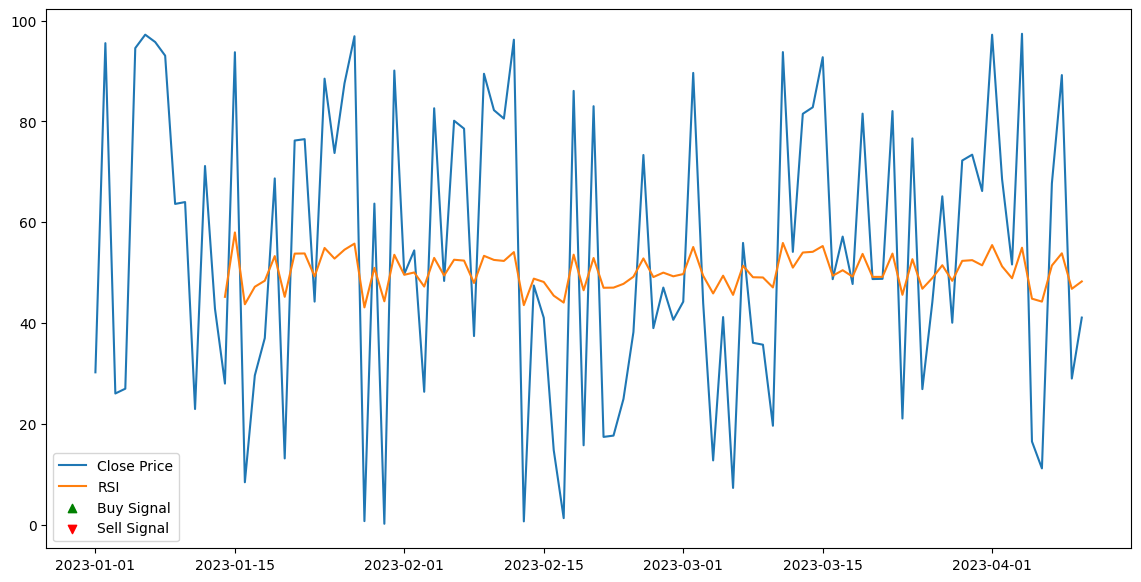

In [7]:
# Install necessary libraries
!pip install pandas numpy ta

import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

# Example data
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'close': np.random.random(100) * 100
}

df = pd.DataFrame(data)

# Parameters
rsi_period = 14
overbought_level = 70
oversold_level = 30

# Calculate RSI using ta library
df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=rsi_period).rsi()

# Simulate buy and sell signals
df['signal'] = 0  # Default to no signal
df.loc[df['rsi'] > overbought_level, 'signal'] = -1  # Sell signal
df.loc[df['rsi'] < oversold_level, 'signal'] = 1  # Buy signal

# Simulate closing positions
df['position'] = df['signal'].replace(to_replace=0, method='ffill')

# Print the resulting DataFrame
print(df)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['rsi'], label='RSI')

# Mark buy and sell signals on the plot
buy_signals = df[df['signal'] == 1]
sell_signals = df[df['signal'] == -1]

plt.scatter(buy_signals['date'], buy_signals['close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['date'], sell_signals['close'], marker='v', color='r', label='Sell Signal', alpha=1)

plt.legend()
plt.show()
